In [1]:
# !pip install termcolor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.dummy import DummyRegressor


#подготовка данных
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

#настройка гиперпараметров
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

%matplotlib inline

# Описание датасета
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict. (target)

# Обзор данных

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
#смотрим на размер датафрейма
df.shape

(8693, 14)

In [4]:
#смотрим какие типы данных у нас есть
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Кол-во транспортированных пассажиров - 50.36%
Кол-во не транспортированных пассажиров - 49.64%


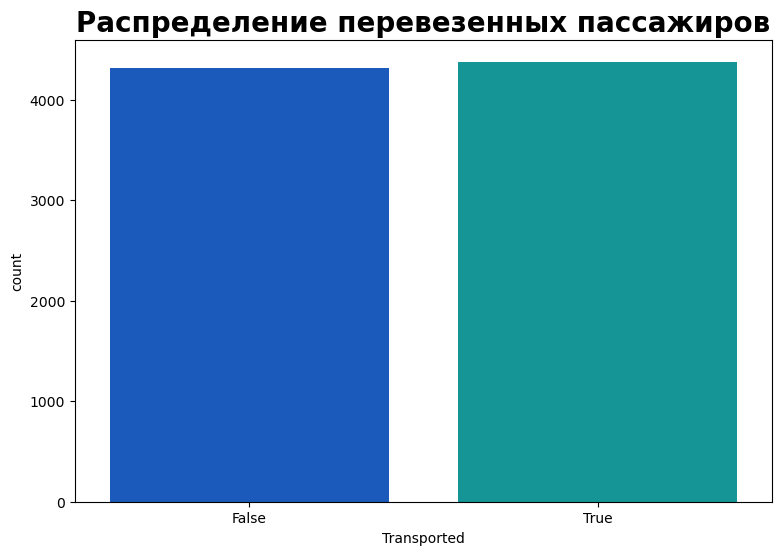

In [6]:
# взглягнем на нашу целевую переменную и посмотрим, 
# сколько человек было транспортировано, а сколько нет.
plt.figure(figsize=(9,6))

sns.countplot(x='Transported', data=df, palette = 'winter')
plt.title("Распределение перевезенных пассажиров", size = 20, weight='bold')

print(colored(f"Кол-во транспортированных пассажиров - {(len(df[df['Transported']==True]) / df.shape[0])*100:.2f}%", 'cyan'))
print(colored(f"Кол-во не транспортированных пассажиров - {(len(df[df['Transported']==False]) / df.shape[0])*100:.2f}%", 'cyan'))

plt.show()

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

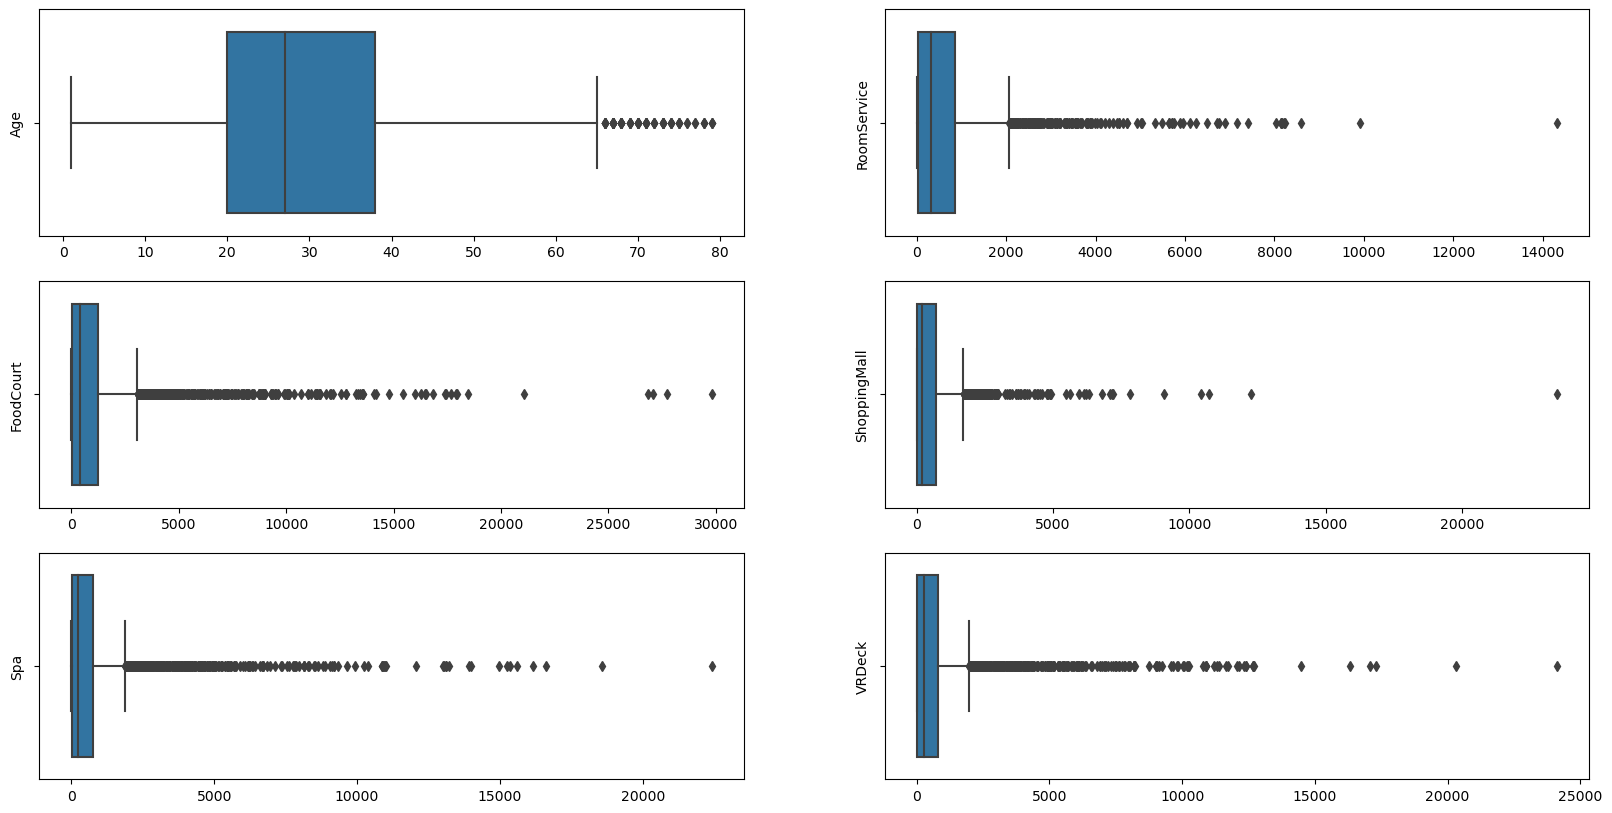

In [7]:
# Смотрим, есть ли у нас выбросы в данных
fig = plt.figure(figsize = (20, 10))
cont = 1
for i in range(len(df.dtypes)):
    if df.dtypes[i] == 'float64':
        p = fig.add_subplot(3, 2, cont)
        #We plot only !=0 values to see true outliers
        sns.boxplot(df[df[df.columns[i]] != 0][df.columns[i]])
        p.set_ylabel(df.columns[i])
        p.set_xlabel('')
        cont+=1

In [8]:
#исключаем выбросы
df = df[(df['RoomService'] < 14000) | (pd.isna(df['RoomService']))]
df = df[(df['ShoppingMall'] < 20000)| (pd.isna(df['ShoppingMall']))]
df = df[(df['Spa'] < 20000)| (pd.isna(df['Spa']))]
df = df[(df['VRDeck'] < 20000)| (pd.isna(df['VRDeck']))]
#df
df.shape

(8688, 14)

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

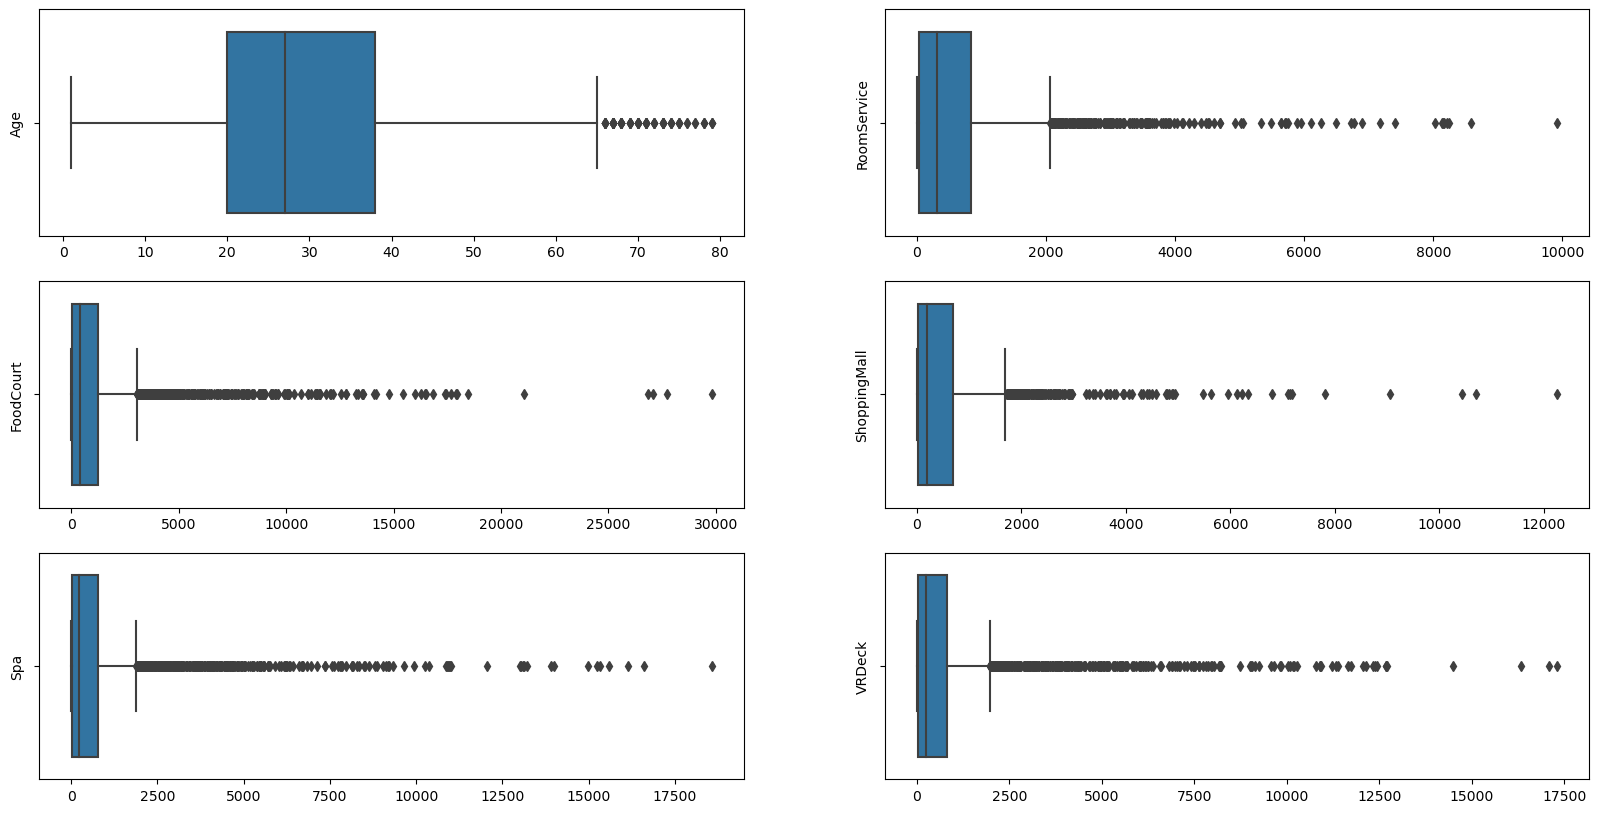

In [9]:
# Смотрим, есть ли у нас выбросы в данных
fig = plt.figure(figsize = (20, 10))
cont = 1
for i in range(len(df.dtypes)):
    if df.dtypes[i] == 'float64':
        p = fig.add_subplot(3, 2, cont)
        #We plot only !=0 values to see true outliers
        sns.boxplot(df[df[df.columns[i]] != 0][df.columns[i]])
        p.set_ylabel(df.columns[i])
        p.set_xlabel('')
        cont+=1

In [9]:
df = df.set_index('PassengerId')
df['Transported'] = df['Transported'].map({True: 1, False: 0})                
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8509.000000,8507.000000,8505.000000,8480.000000,8506.000000,8500.000000,8688.000000
mean,28.821366,223.097332,455.763433,171.035731,308.535269,299.800118,0.503798
std,14.483233,649.135976,1604.345238,549.297028,1111.425817,1095.155945,0.500014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,46.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,79.000000,9920.000000,29813.000000,12253.000000,18572.000000,17306.000000,1.000000


In [10]:
# Создам новые переменные PassengerId and Cabin columns
# новая колонка - группа
df['Group'] = df.index.str[:4]
df['Group'] = df.Group.astype(int)
# новая колонка - номер группы
df['Number'] = df.index.str[-2:]
df['Number'] = df.Number.astype(int)
# новая колонка - Deck
df['Deck'] = df.Cabin.str[0]
# новая колонка - номер кабины
df['NumCabin'] = df.Cabin.str[2:-2]
# новая колонка - сторона
df['Side'] = df.Cabin.str[-1]
df = df.drop('Cabin', axis = 1)

In [11]:
encoder=LabelEncoder()
temp=df.describe()
features=df.columns
numerical_features=temp.columns
for i in numerical_features:
    mean=df[i].mean()
    df[i]=df[i].fillna(value=mean)
categorical_features=['HomePlanet', 'CryoSleep','Destination','Name','VIP', 'Deck', 'Side']
for i in categorical_features:
    df[i]=encoder.fit_transform(np.array(df[i]).reshape(-1,1))
    median=df[i].median()
    df[i]=df[i].fillna(value=median)
df=df.drop(['Name'],axis='columns')

E:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
# #колонка 'Name' не будет влиять никак на наши данные, дропнем ее.
# df =  df.drop(['Name'] , axis=1)

In [13]:
df.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Group             0
Number            0
Deck              0
NumCabin        198
Side              0
dtype: int64

In [14]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Number,Deck,NumCabin,Side
PassengerId,,,,,,,,,,,,,,,,
0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0,0
0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,2,1,5,0,1
0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,3,1,0,0,1
0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,3,2,0,0,1
0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,4,1,5,1,1


# Предобработка данных

In [15]:
# избавляемся от пропусков
def fillnull(df):
    notest = 'Transported' in df.columns
    for i in range(len(df.columns)):
        if(df.dtypes[i] == float):
            if notest:
                df[df.columns[i]] = df[df.columns[i]].fillna(df.groupby(['Group','Transported'])[df.columns[i]].transform('mean'))
            df[df.columns[i]] = df[df.columns[i]].fillna(df.groupby(['Group'])[df.columns[i]].transform('mean'))
            if notest:
                df[df.columns[i]] = df[df.columns[i]].fillna(df.groupby(['Transported'])[df.columns[i]].transform('mean'))
            df[df.columns[i]].fillna(df[df.columns[i]].mean(), inplace=True)
        else:
            #I need to figure out how to replace null values with the mode of their groups in cathegorical columns as i do with
            #the mean in numeric columns
            if notest:
                df.dropna(inplace = True)
            else:
                df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].mode()[0])
    print(df.isnull().sum())

fillnull(df)

df['CryoSleep'] = df['CryoSleep'] ==True
df['VIP'] = df['VIP'] ==True

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Group           0
Number          0
Deck            0
NumCabin        0
Side            0
dtype: int64


In [16]:
#приведем колонку NumCabin  к типу данных int
df['NumCabin'] = df.NumCabin.astype(int)

In [17]:
#построим матрицу корреляций 
df.corr()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Number,Deck,NumCabin,Side
HomePlanet,1.000000,0.081040,0.043176,0.119872,0.115690,0.197730,0.055551,0.095549,0.045095,0.035344,0.107336,-0.003203,0.037095,-0.371295,-0.176716,0.002823
CryoSleep,0.081040,1.000000,-0.097403,-0.070205,-0.076538,-0.249975,-0.204229,-0.222847,-0.200870,-0.198324,0.459192,-0.006608,0.064793,0.017151,-0.037354,0.020721
Destination,0.043176,-0.097403,1.000000,-0.001950,-0.043236,0.047771,-0.110085,0.019400,-0.050013,-0.074496,-0.104929,-0.004008,-0.032636,0.181670,0.100630,-0.010038
Age,0.119872,-0.070205,-0.001950,1.000000,0.091528,0.069515,0.125545,0.041399,0.115702,0.098687,-0.075814,-0.007296,-0.130715,-0.244783,-0.130780,0.011546
VIP,0.115690,-0.076538,-0.043236,0.091528,1.000000,0.044605,0.126333,0.019163,0.060025,0.129875,-0.035131,0.012857,-0.001994,-0.181924,-0.098562,-0.010202
RoomService,0.197730,-0.249975,0.047771,0.069515,0.044605,1.000000,-0.017738,0.060200,0.014211,-0.020123,-0.246237,0.003323,-0.028508,-0.026699,-0.008978,-0.012264
FoodCourt,0.055551,-0.204229,-0.110085,0.125545,0.126333,-0.017738,1.000000,-0.013896,0.202511,0.224441,0.049692,-0.010453,0.022796,-0.321295,-0.181277,0.021498
ShoppingMall,0.095549,-0.222847,0.019400,0.041399,0.019163,0.060200,-0.013896,1.000000,0.018392,-0.006130,0.007844,0.011316,-0.042150,-0.026583,0.004878,-0.017740
Spa,0.045095,-0.200870,-0.050013,0.115702,0.060025,0.014211,0.202511,0.018392,1.000000,0.160775,-0.220803,-0.004876,0.020440,-0.229533,-0.131154,0.004531
VRDeck,0.035344,-0.198324,-0.074496,0.098687,0.129875,-0.020123,0.224441,-0.006130,0.160775,1.000000,-0.210371,0.013187,0.008373,-0.259528,-0.140513,-0.008882


Можно сцелать вывод, что у нашей целевой переменной Transported хорошая корреляция с Cryosleep и плохая корреляция с RoomService, Spa and VRDeck.

# Подготовка данных к обучению

In [18]:
target = df['Transported']
df =  df.drop(['Transported'] , axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=33, stratify=target)

In [20]:
features_to_encode = X_train.columns[X_train.dtypes==object].tolist()

col_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown = 'ignore'),features_to_encode),
                        remainder = "passthrough",
                        )
features_to_encode

[]

In [22]:
# количество деревьев в случайном лесу
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 20)]
# Количество делений
max_features = ['auto', 'sqrt', 'log2']
# максимальное количество листов деревьев
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
# минимальное количество выборок для деления узла
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 20)]
# минимальное количество выборок для каждого конечного узла
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 30, num = 20)]
# метод отбора образцов для каждого обученного дерева
bootstrap = [True, False]
# создание случайной сетки
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Обучение модели

In [23]:
clf = DecisionTreeClassifier().fit(X_train,y_train)

In [25]:
clf_pred = clf.predict(X_test)
print(f"Точность модели accuracy: {round(accuracy_score(y_test,clf_pred),3)*100} %")

Точность модели accuracy: 73.5 %


In [26]:
# Найдём наиболее подходящие гиперпараметры для модели с учётом отобранного выше сочетания признаков
# Внимание, ресурсозатратный код
dtc = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [x for x in range(1, 10)],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [x for x in range(1, 10)]
}
clf = GridSearchCV(dtc, param_grid)
clf.fit(X_train, y_train)
print(f'CV Score: {clf.best_score_:.4f}')
params = clf.best_params_
print(f'Best parameters: {params}')

CV Score: 0.7786
Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 5}


In [27]:
# Построим модель с найденными гиперпараметрами
clf = DecisionTreeClassifier(random_state=42, **params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Точность на обучающем наборе: {clf.score(X_train, y_train):.4f}')
print(f'Точность на тестовом наборе: {clf.score(X_test, y_test):.4f}')
print(f'Accuracy: {accuracy_score(y_pred, y_test):.4f}')

Точность на обучающем наборе: 0.8211
Точность на тестовом наборе: 0.7719
Accuracy: 0.7719


In [28]:
# используем случайную сетку для подбора гиперпараметров
rf = RandomForestClassifier()
# случайный поиск параметров с использованием 3-кратной перекрестной проверки
# поиск по 100 различным комбинациям и использование всех доступных ядер
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
pipe = make_pipeline(col_trans, rf_random)
# обучение модели
pipe.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                                    n_iter=100, n_jobs=-1,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [10, 21,
                                                                       32, 43,
                                                                       54, 65,
                                                                       76, 87,
                                       

In [29]:
rf_random.best_params_

{'n_estimators': 687,
 'min_samples_split': 22,
 'min_samples_leaf': 14,
 'max_features': 'auto',
 'max_depth': 98,
 'bootstrap': False}

In [30]:
pipe = make_pipeline(col_trans, rf_random.best_estimator_)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(f"Точность модели accuracy: {round(accuracy_score(y_test,y_pred),3)*100} %")

Точность модели accuracy: 79.0 %


In [31]:
# создание сетки параметров по результатам случайного поиска
param_grid = {
    'bootstrap': [True],
    'max_depth': [int(x) for x in np.linspace(55, 75, num = 3)],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [5, 7],
    'min_samples_split': [int(x) for x in np.linspace(8, 16, num = 4)],
    'n_estimators': [int(x) for x in np.linspace(200, 800, num = 3)]
}
# создание модели
rf = RandomForestClassifier()
# создание модели поиска по сетки
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
pipe = make_pipeline(col_trans, grid_search)
# обучение модели
pipe.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('gridsearchcv',
                 GridSearchCV(cv=3, estimator=RandomForestClassifier(),
                              n_jobs=-1,
                              param_grid={'bootstrap': [True],
                                          'max_depth': [55, 65, 75],
                                          'max_features': ['sqrt', 'log2'],
                                          'min_samples_leaf': [5, 7],
                                          'min_samples_split': [8, 10, 13, 16],
                                          'n_estimators': [200, 500, 800]},
                              verbose=2))])

In [32]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 55,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

In [33]:
pipe = make_pipeline(col_trans, grid_search.best_estimator_)
pipe.fit(X_train, y_train)
        
y_pred = pipe.predict(X_test)

print(f"Точность модели accuracy: {round(accuracy_score(y_test,y_pred),3)*100} %")

Точность модели accuracy: 79.2 %
